# PCA based Noise Reduction

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.datasets import load_digits
(X_train, y_train), (X_test, y_test)=datasets.mnist.load_data()

In [3]:
print(X_test.shape)

(10000, 28, 28)


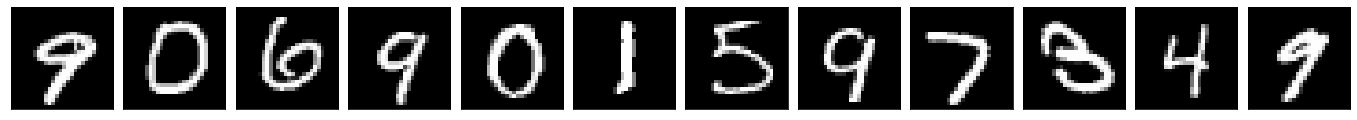

In [4]:
def plot_digits(data):
  fig, axes=plt.subplots(1, 12, figsize=(24, 2), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow((data[i+9].reshape(28, 28)), cmap='gray')
plot_digits(X_test)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255.
noise_ratio = 0.5
X_train_noisy = X_train + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_train.shape)
X_test_noisy = X_test + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

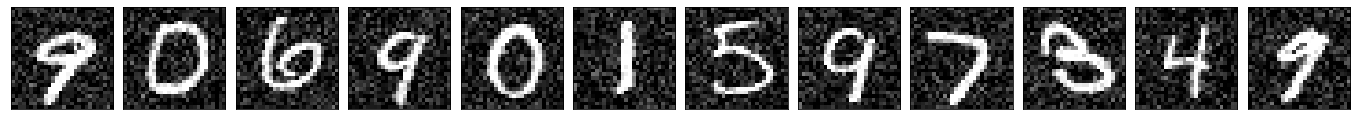

In [6]:
plot_digits(X_test_noisy)

# PCA without Library

In [7]:
pca_init_data = np.array(X_test_noisy)
pca_init_data = pca_init_data.reshape(10000,784)
pca_init_data.shape

(10000, 784)

In [8]:
mean = pca_init_data.mean(0).reshape(784,1)
a = np.ones((10000,1))
pca_zeroMean = pca_init_data - np.dot(a,mean.T)
pca_cov = np.dot(np.transpose(pca_zeroMean),pca_zeroMean)

In [9]:
def pca_img_denoise(n):
    plt.rcParams['figure.figsize'] = [40, 20]
    w, v = np.linalg.eig(pca_cov)
    w_sort = np.sort(w)
    transformatn_mat = []
    for k in range(1,n+1):
        for q in range(0,len(w)):
            if(w[q] == w_sort[len(w_sort)-k]):
                transformatn_mat.append(v[q])
    transformatn_mat = np.array(transformatn_mat).reshape(784,n)
    red_dim_mat = np.dot(pca_init_data,transformatn_mat)
    appx_data = np.dot(red_dim_mat,np.transpose(transformatn_mat)) + np.dot(a,mean.T)
    appx_data = appx_data.reshape(10000,28,28)
    print(f"For N = {n}")
    plt.figure()
    for i in range(1,13):
        plt.subplot(1,12,i)
        plt.axis('off')
        plt.imshow(appx_data[i], cmap='gray')
    plt.show()


### We plot few of the outputs for 
- $\verb|no of components = 2, 27, 52...|$

For N = 2


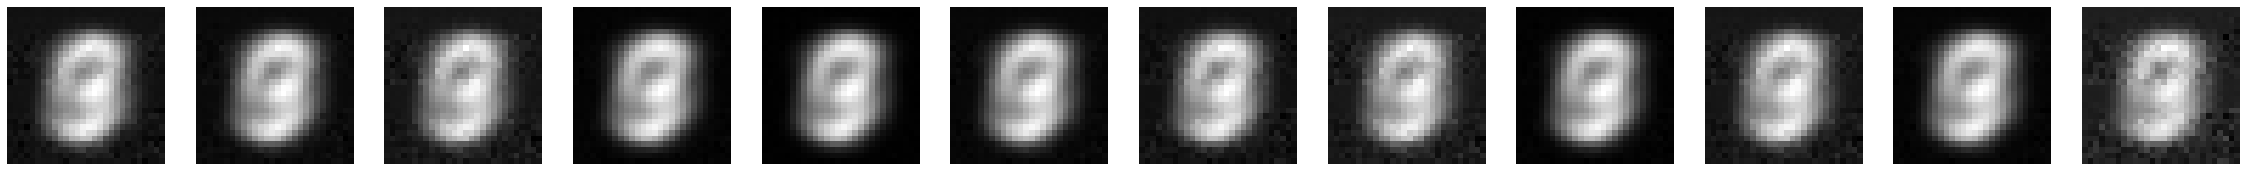

For N = 27


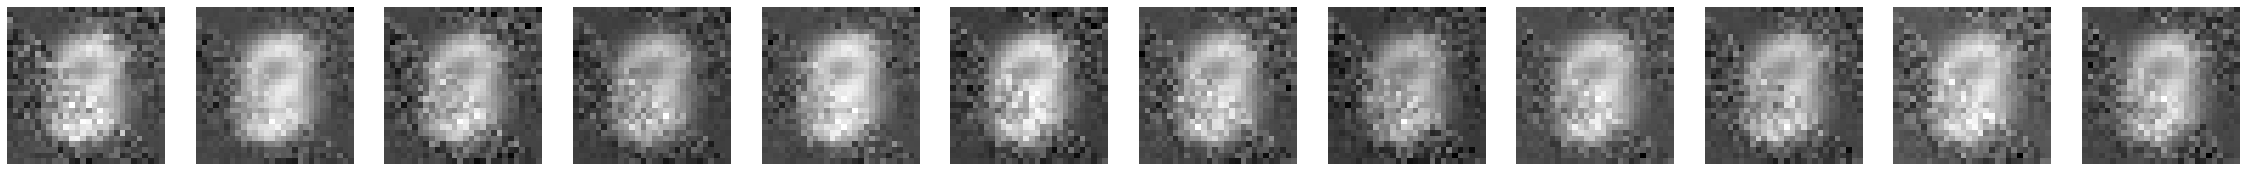

For N = 52


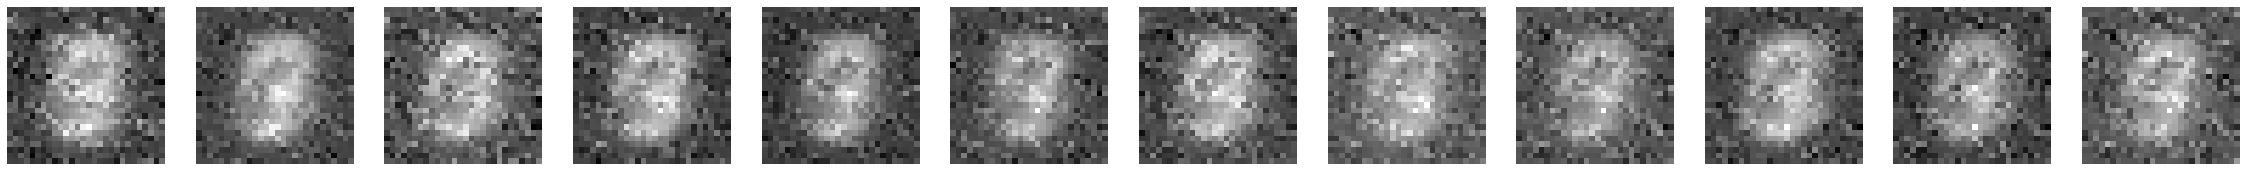

For N = 77


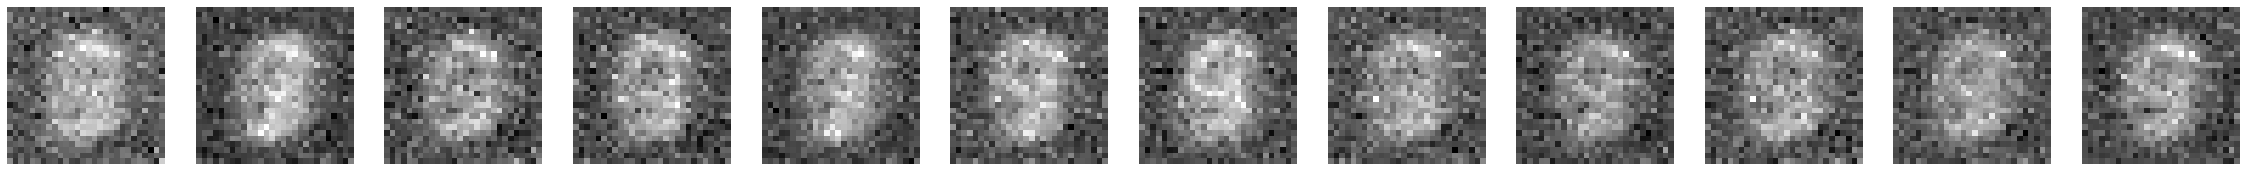

For N = 102


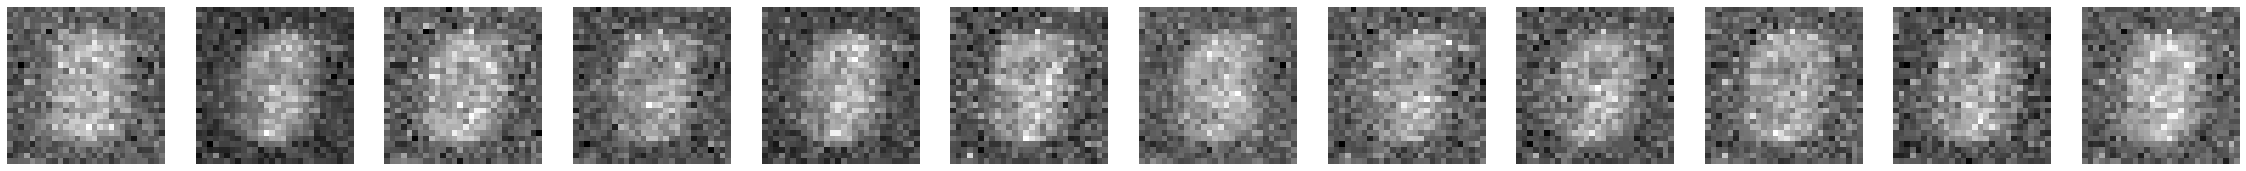

For N = 127


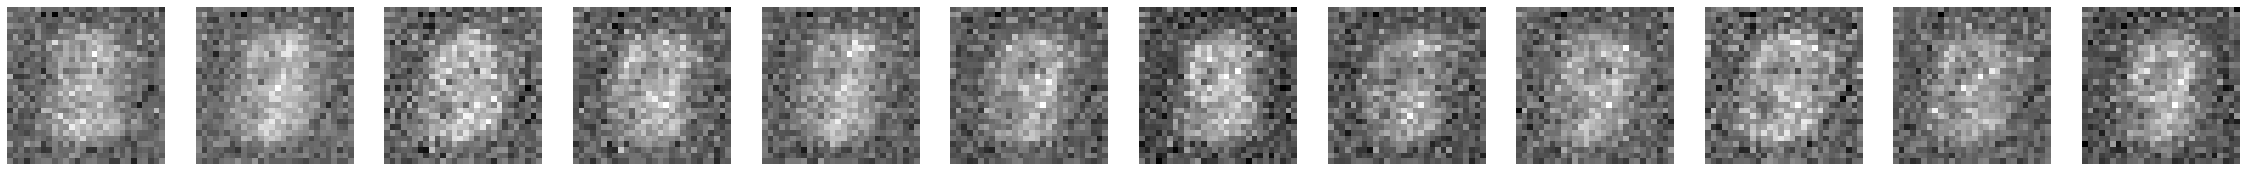

For N = 152


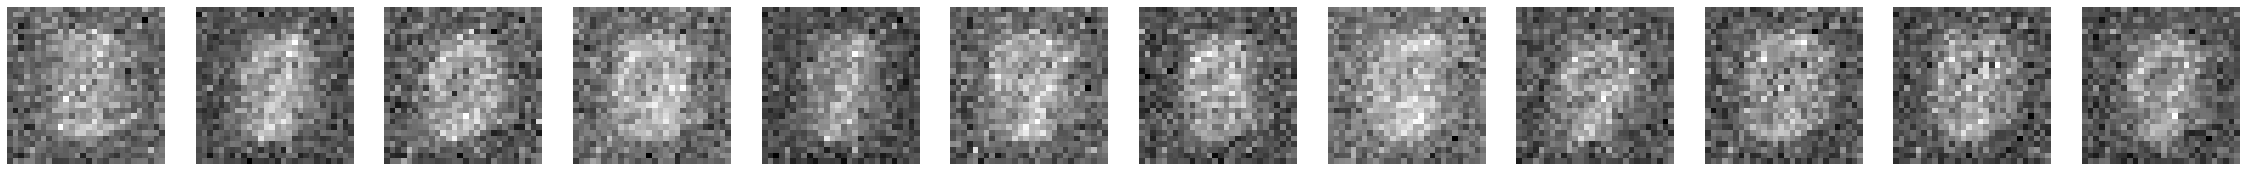

For N = 177


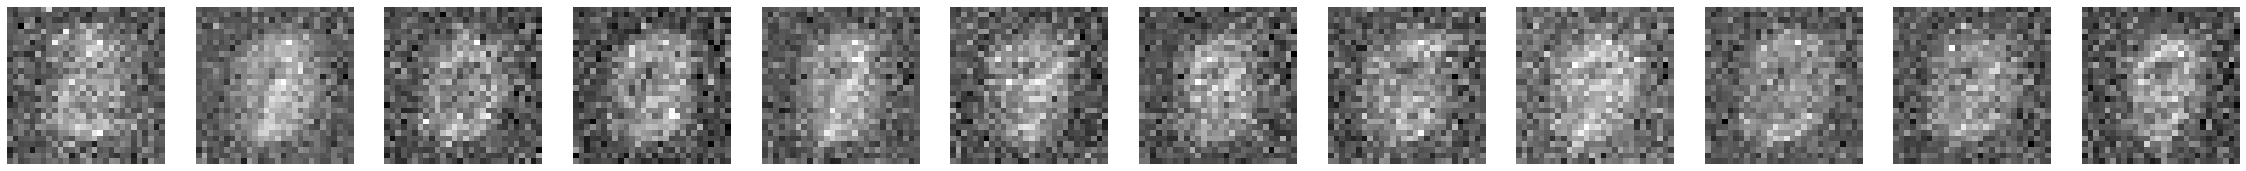

For N = 202


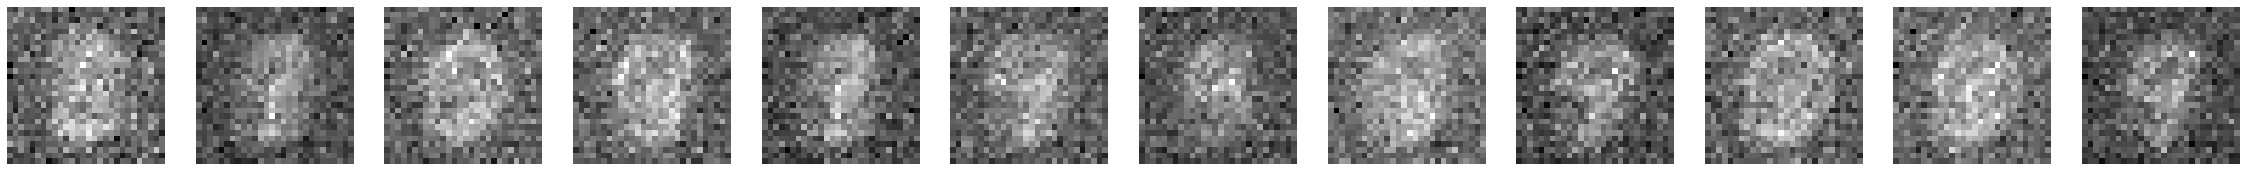

For N = 227


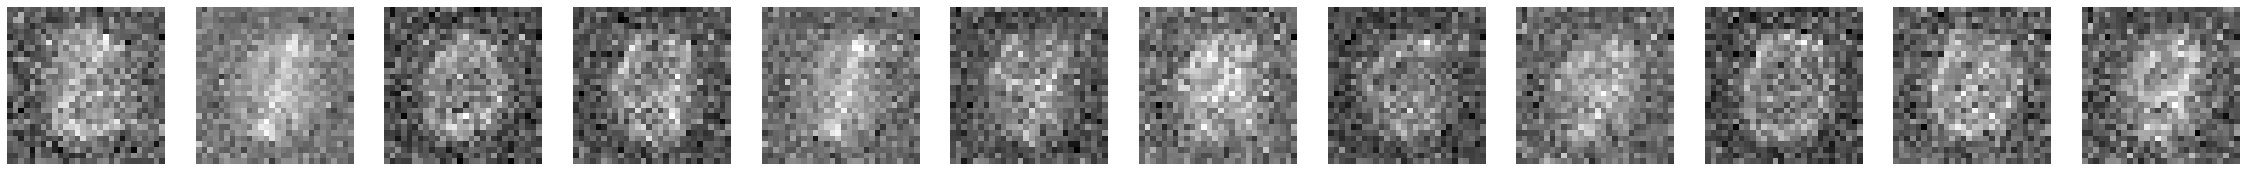

For N = 252


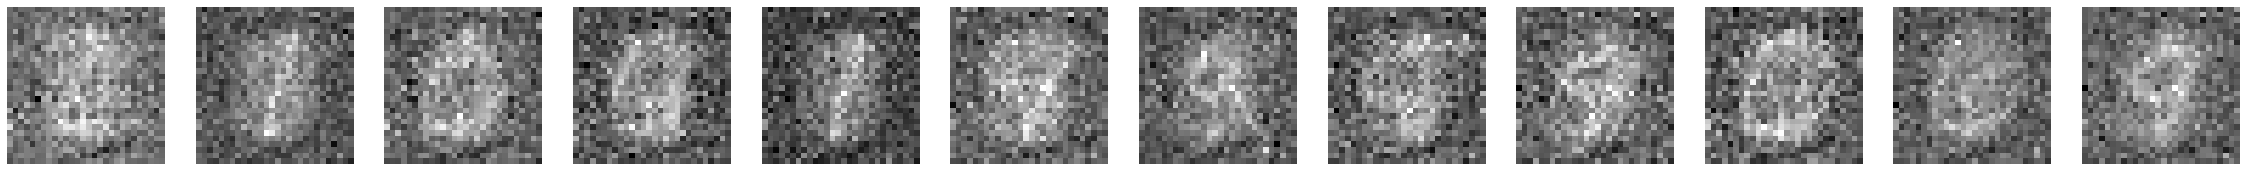

For N = 277


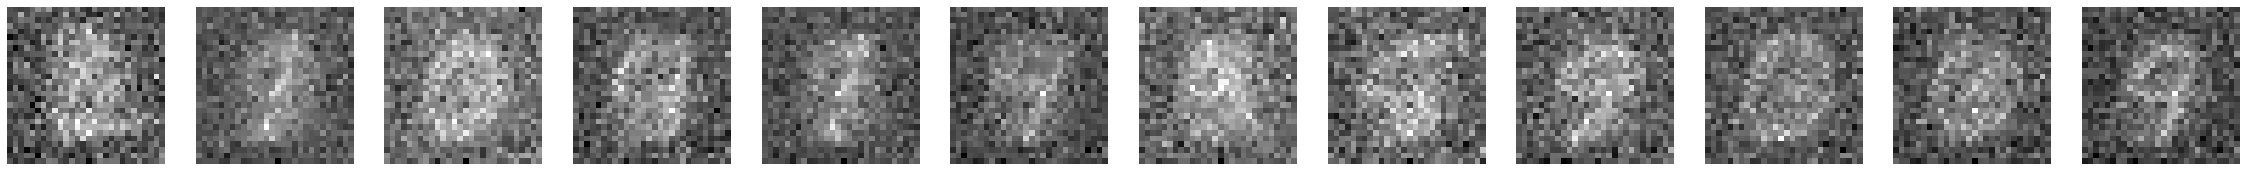

For N = 302


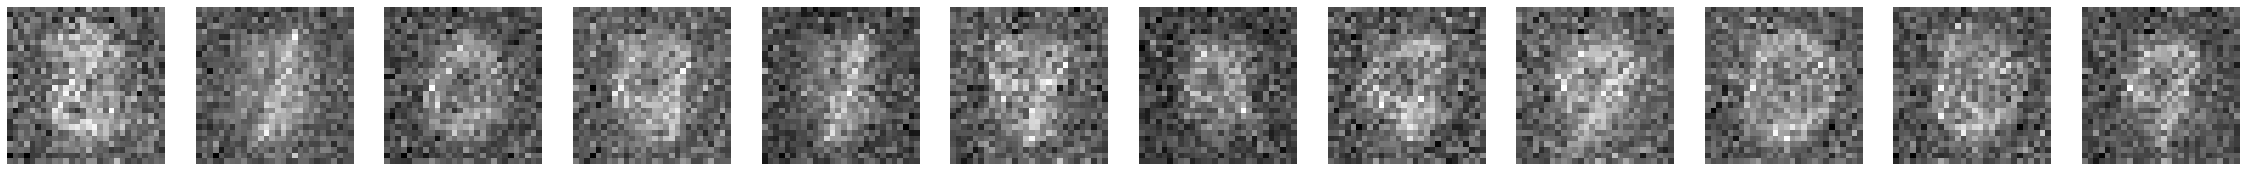

For N = 327


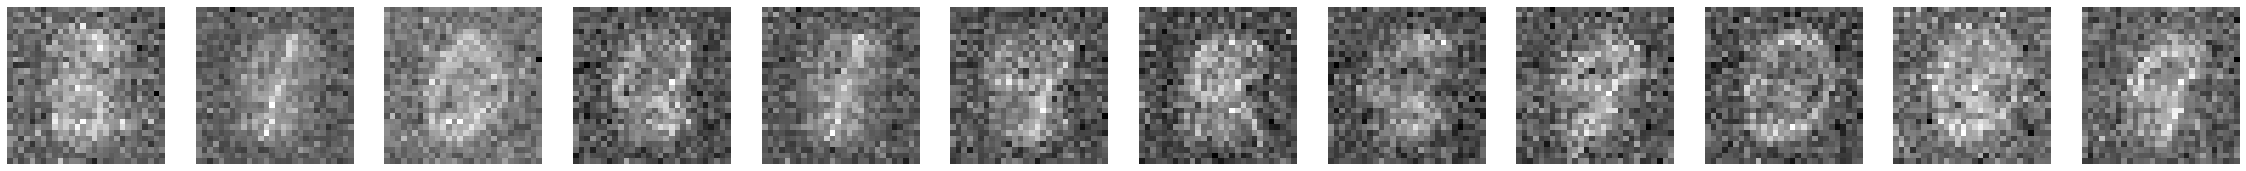

For N = 352


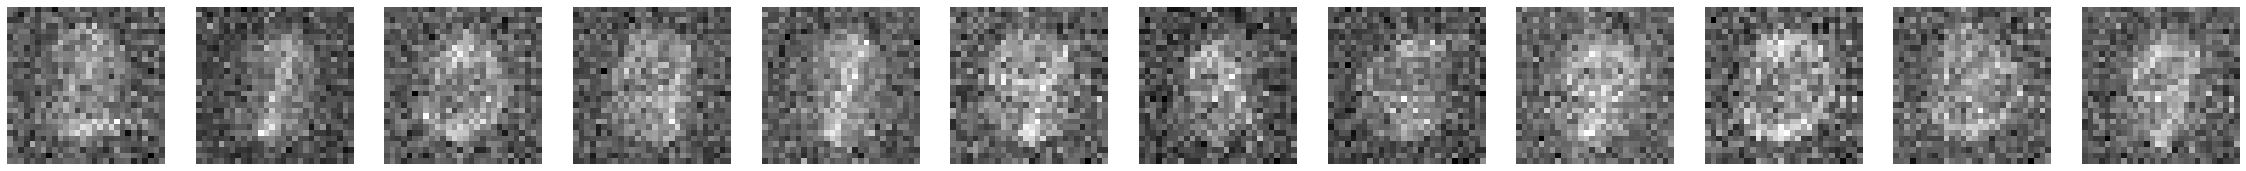

For N = 377


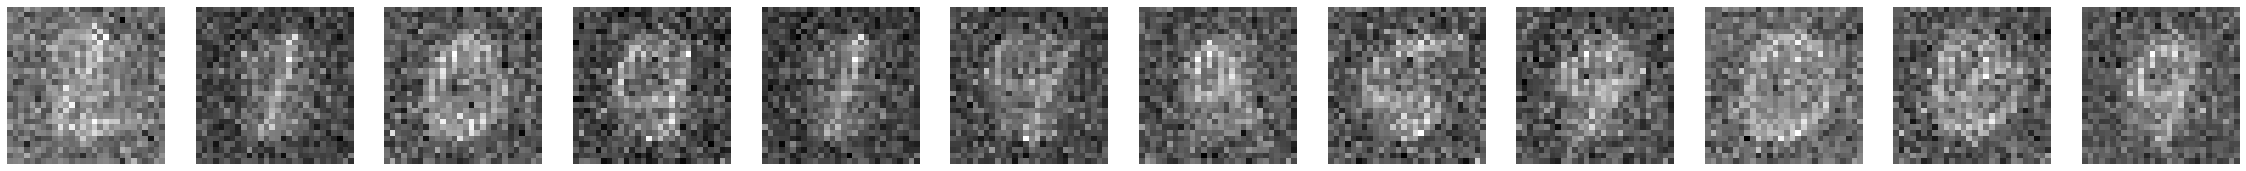

For N = 402


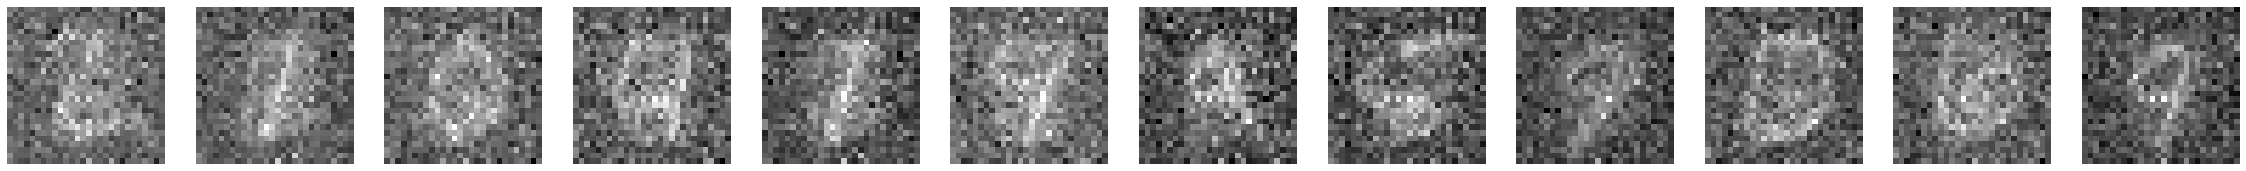

For N = 427


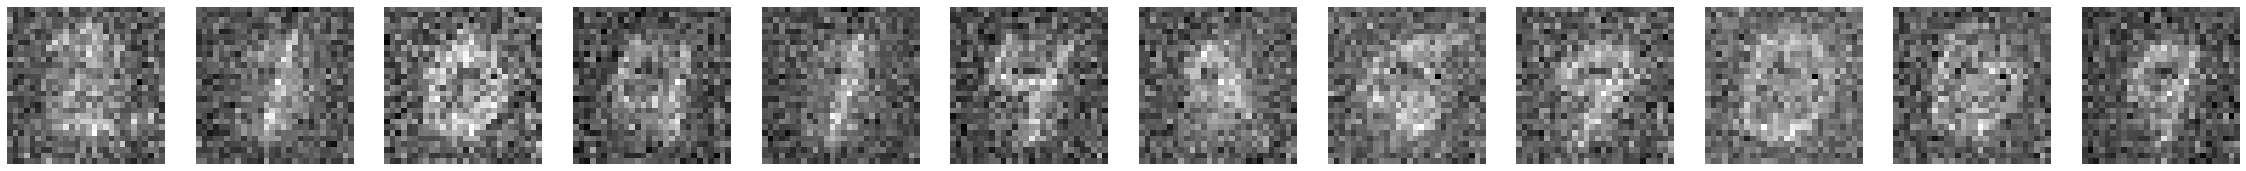

For N = 452


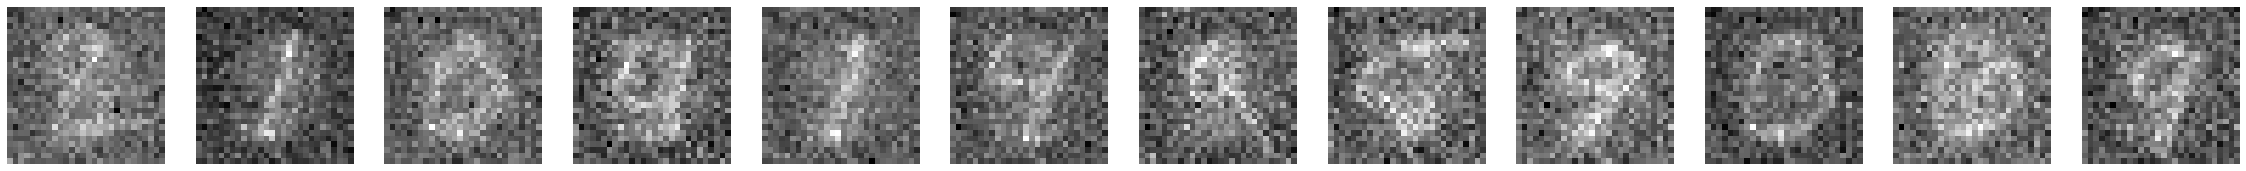

For N = 477


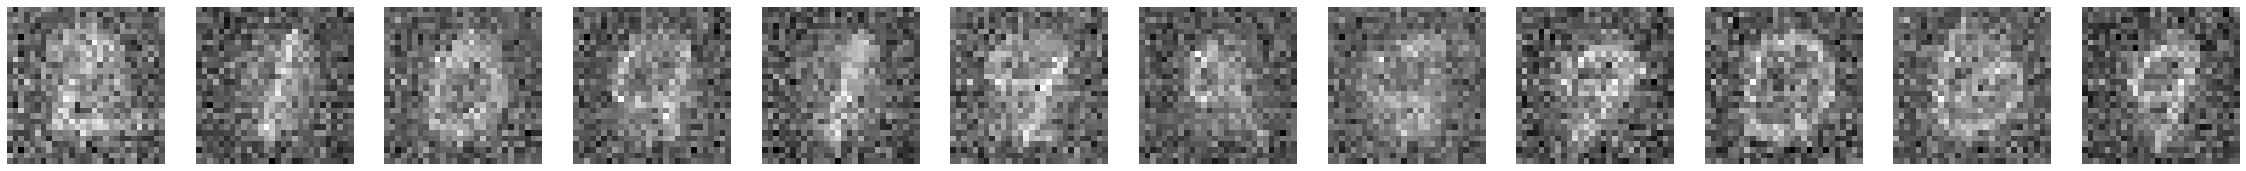

For N = 502


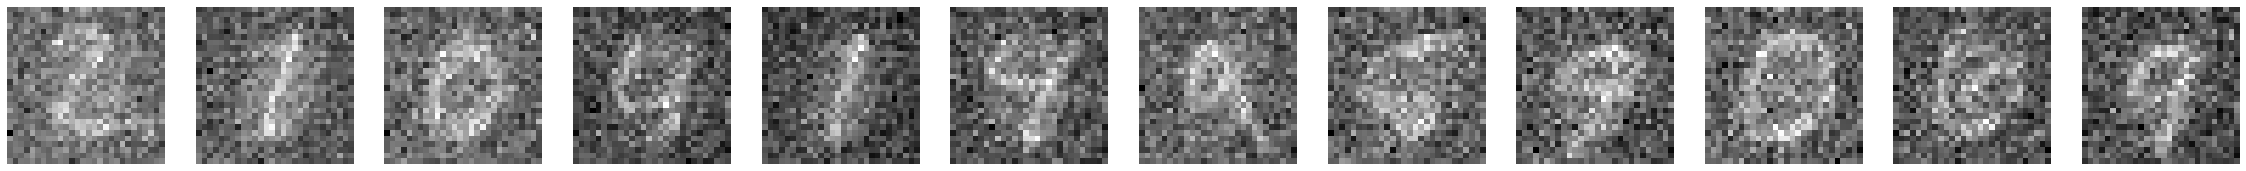

For N = 527


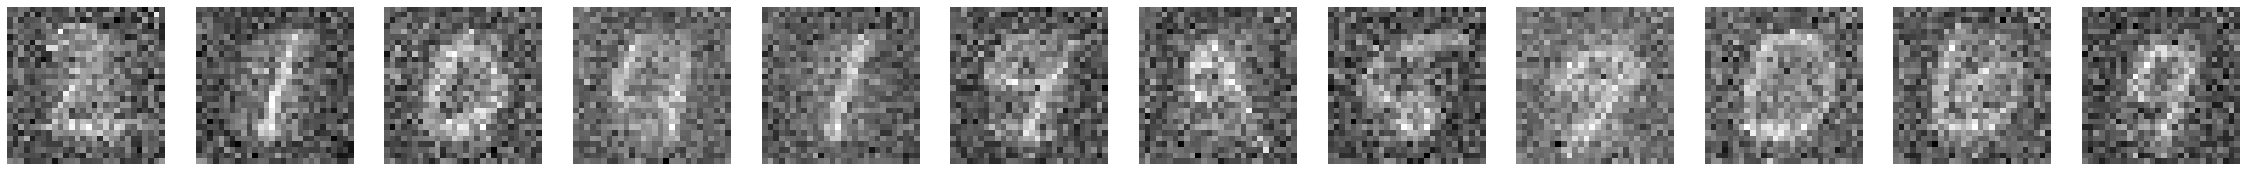

For N = 552


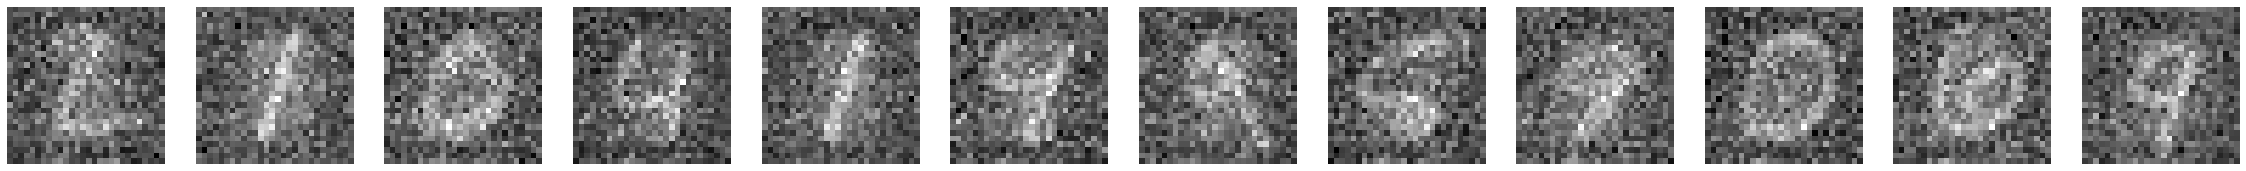

For N = 577


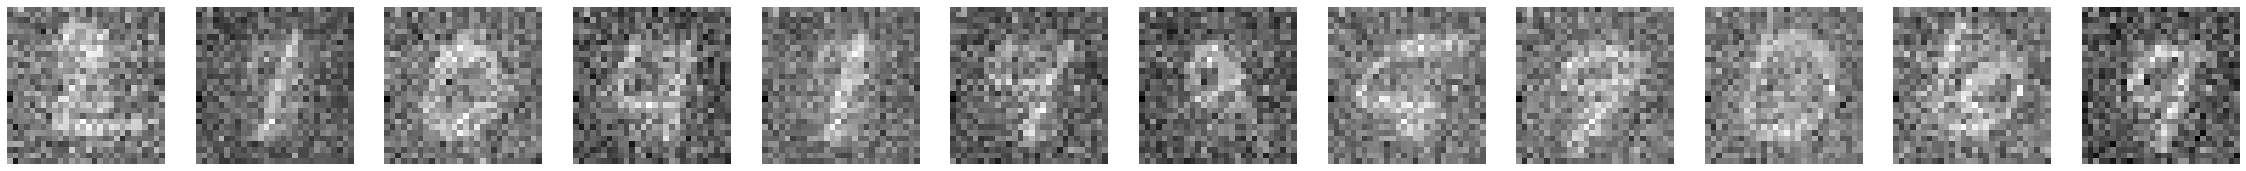

For N = 602


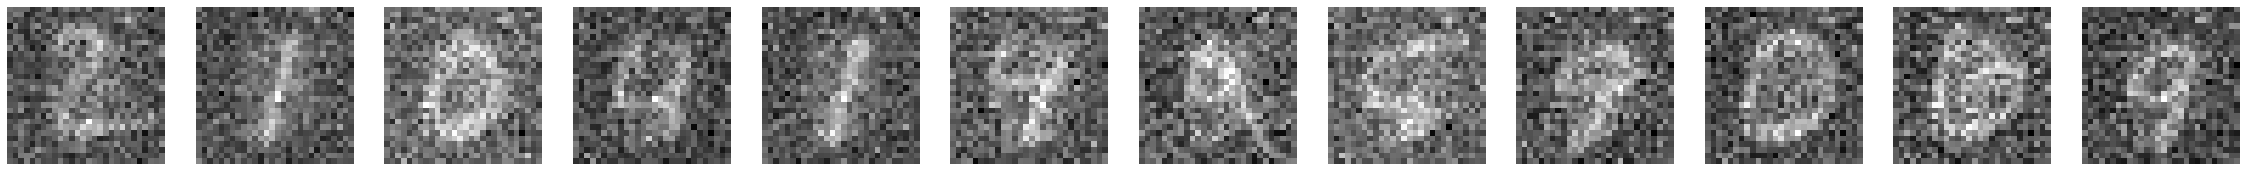

For N = 627


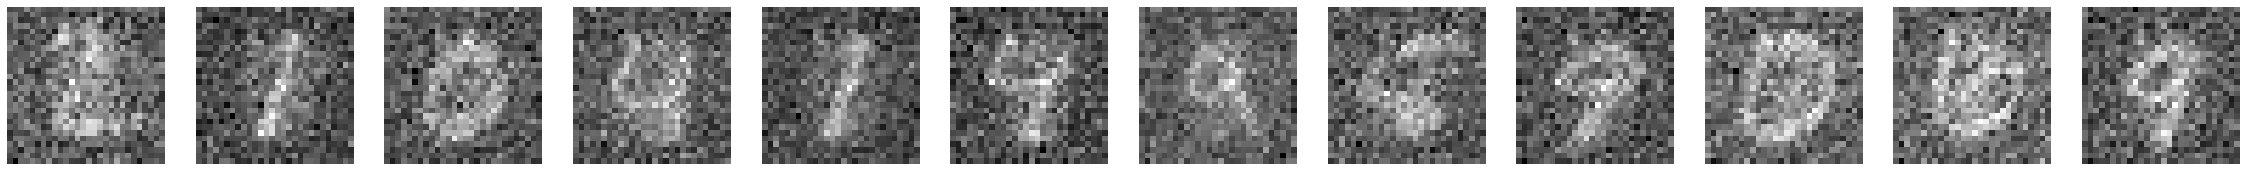

For N = 652


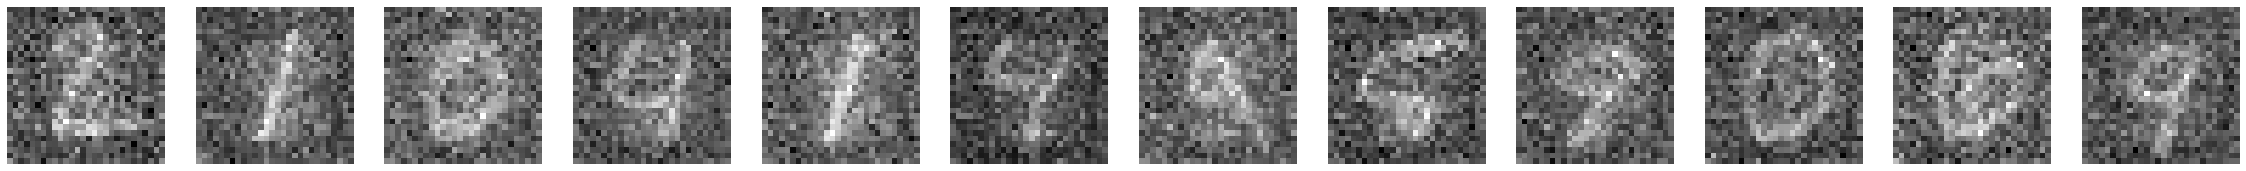

For N = 677


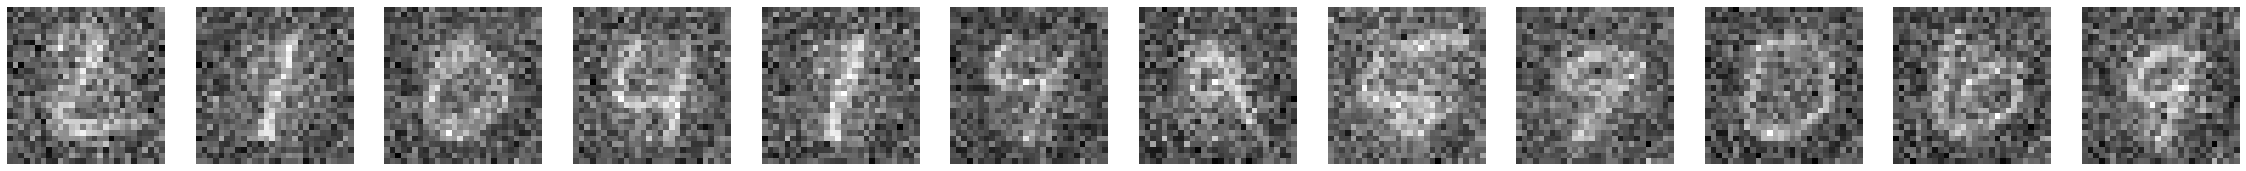

For N = 702


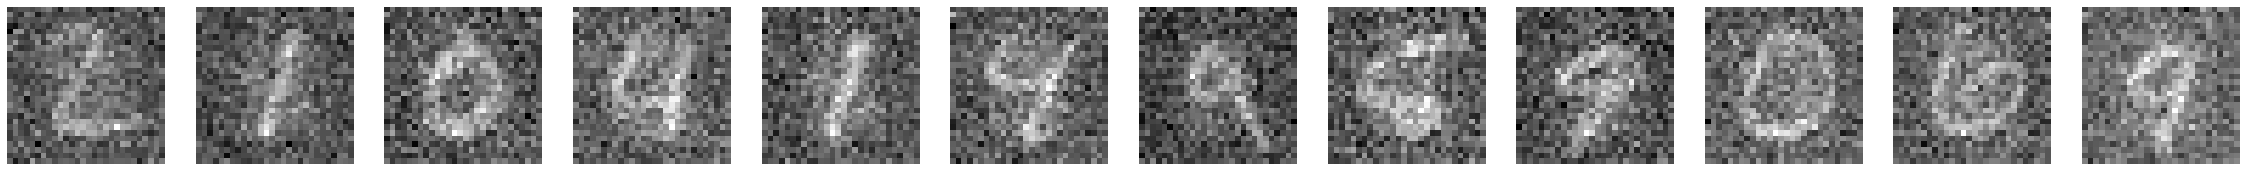

For N = 727


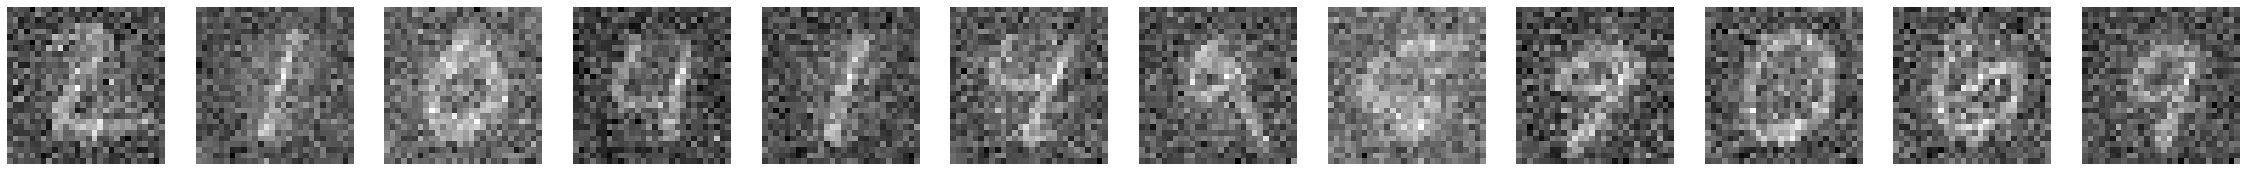

For N = 752


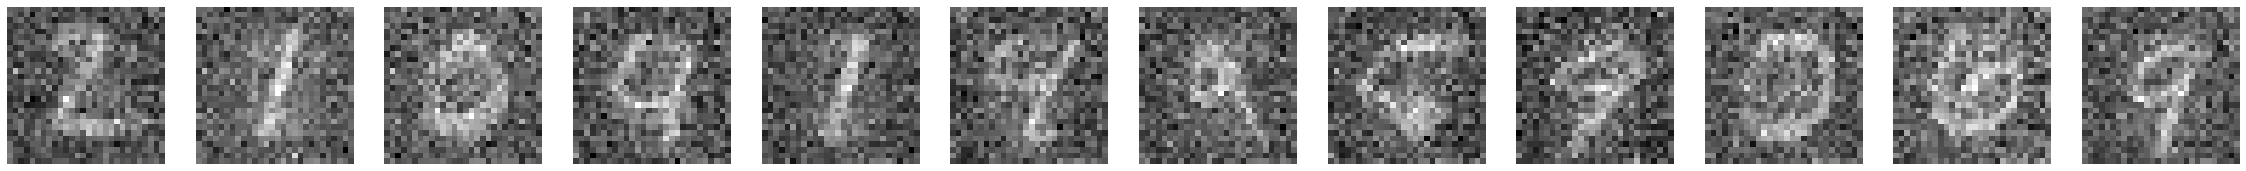

For N = 777


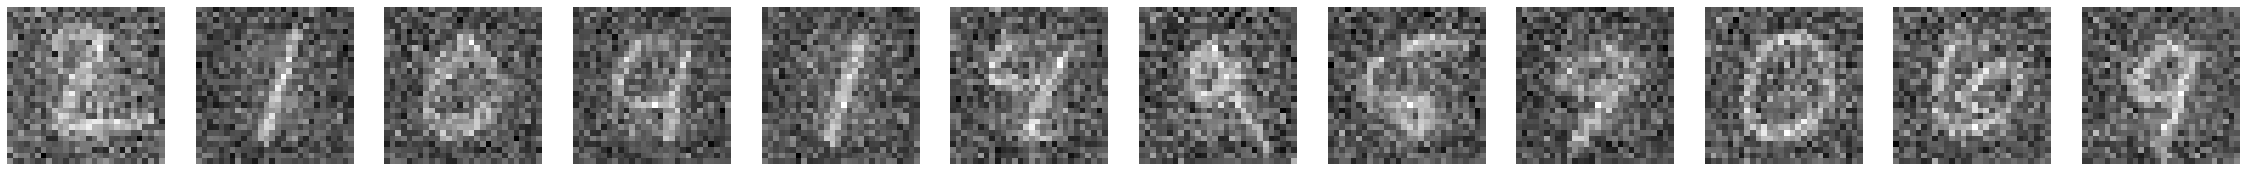

In [10]:
for i in range(2,784,25):
    pca_img_denoise(i)

# PCA using Scikit Learn

In [19]:
def using_lib(n):
    from sklearn.decomposition import PCA
    pca = PCA(n_components = n)
    pca.fit(X_test_noisy)
    components = pca.transform(X_test_noisy)
    fixed = pca.inverse_transform(components).reshape(10000,28,28)
    print(f"For N = {n}")
    plt.figure()
    for i in range(1,13):
        plt.subplot(1,12,i)
        plt.axis('off')
        plt.imshow(fixed[i], cmap='gray')
    plt.show()
    


### We plot few of the outputs for 
- $\verb|no of components = 2, 27, 52...|$
- We notice that the noise is reduced for some intermediate value of n. Here around 102

For N = 2


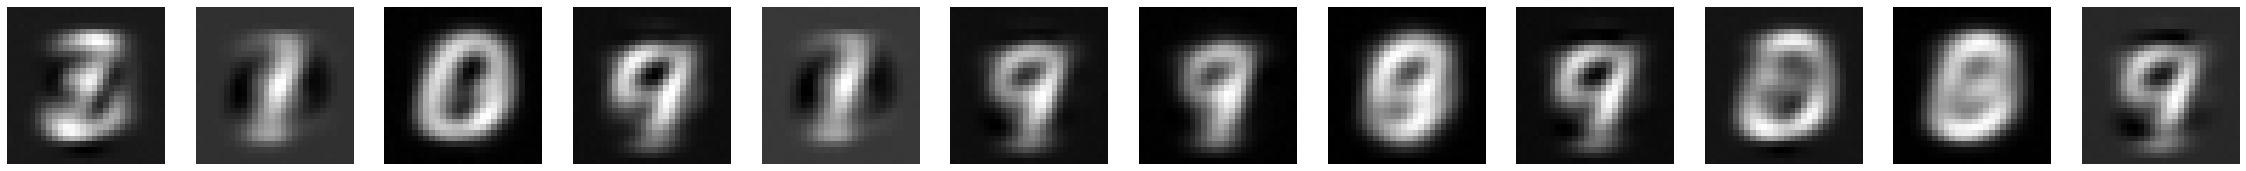

For N = 27


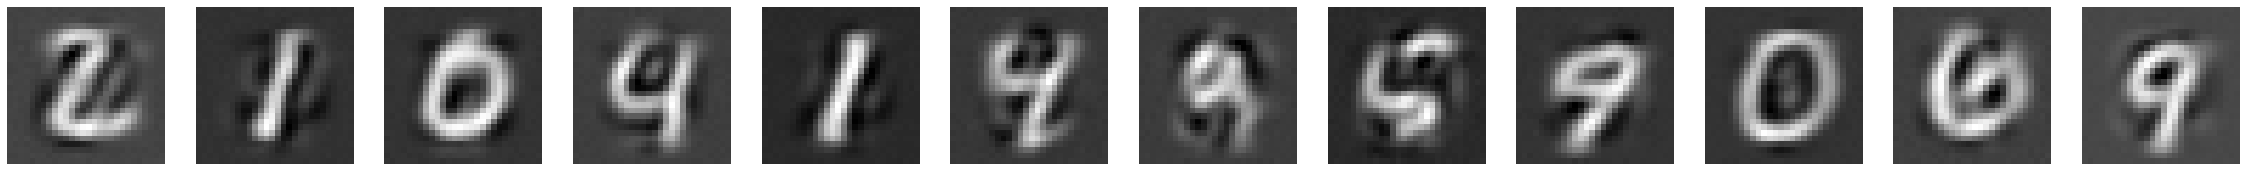

For N = 52


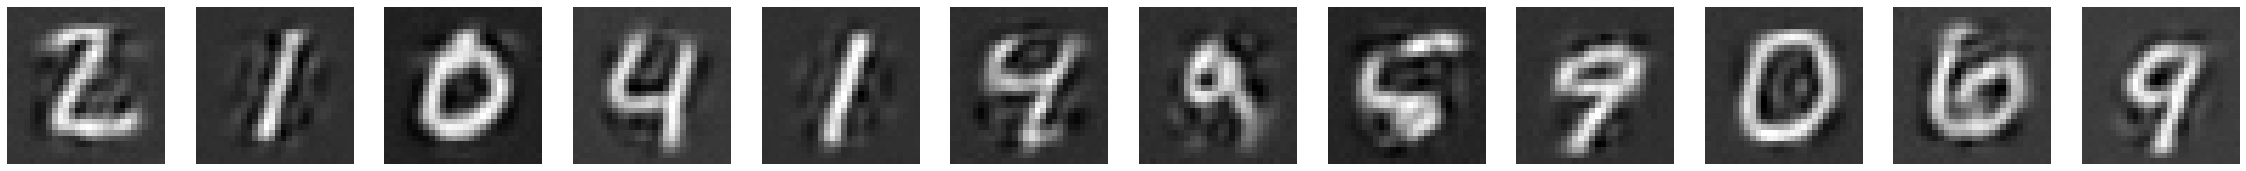

For N = 77


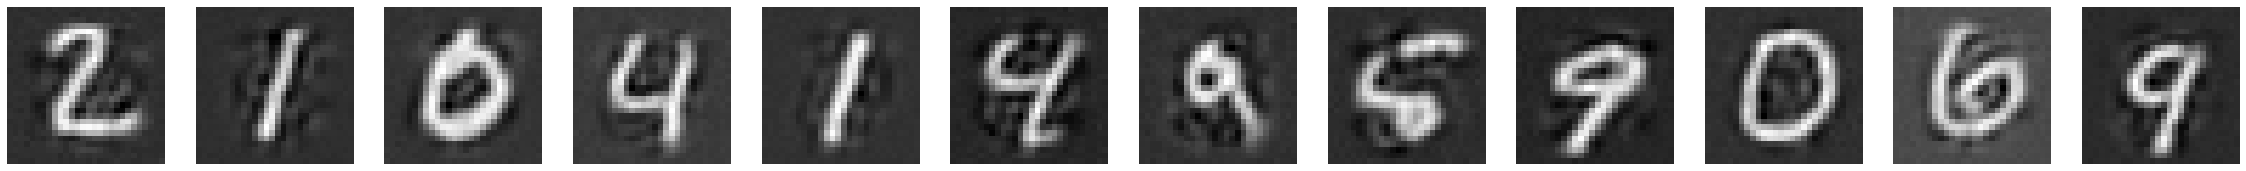

For N = 102


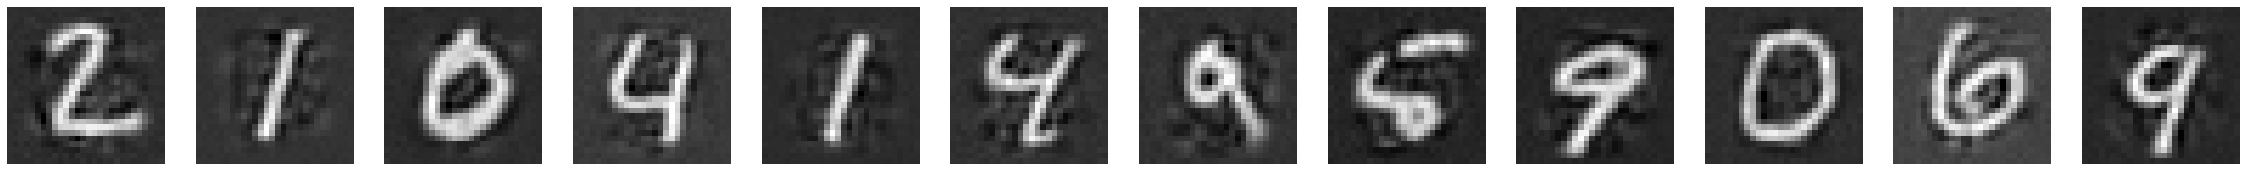

For N = 127


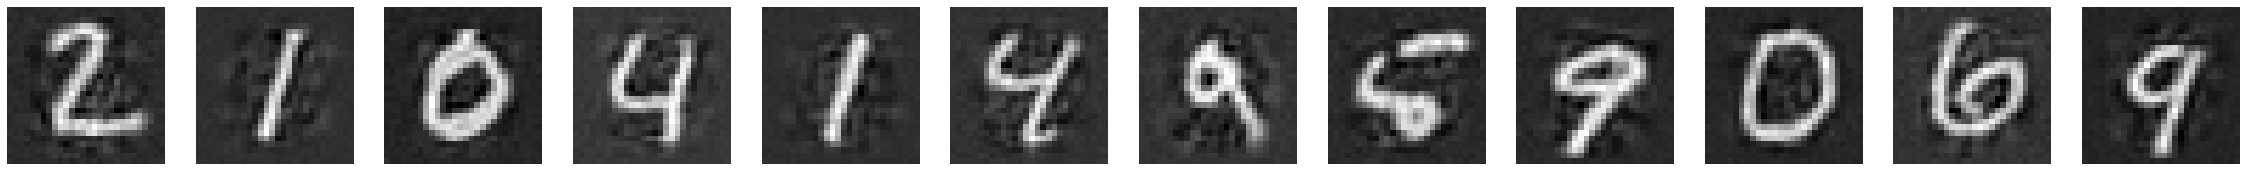

For N = 152


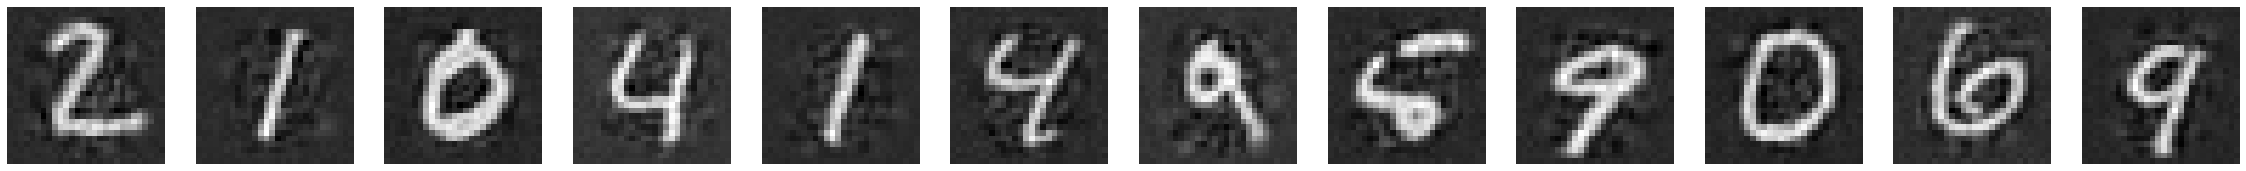

For N = 177


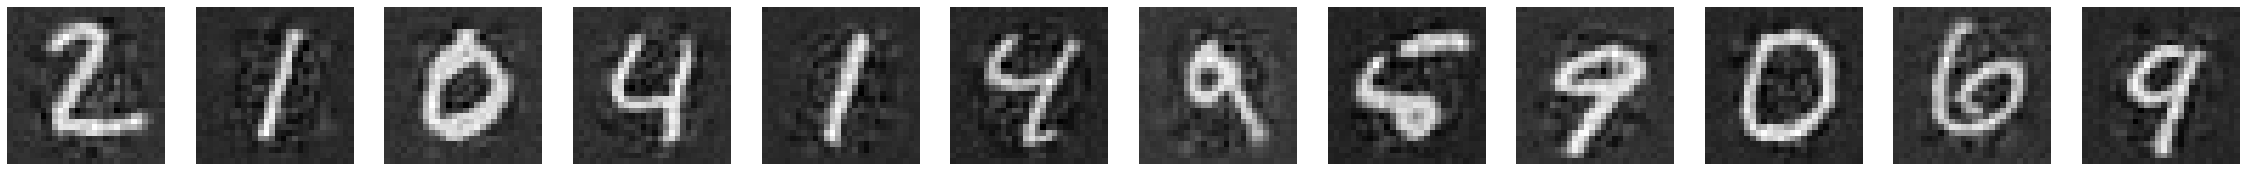

For N = 202


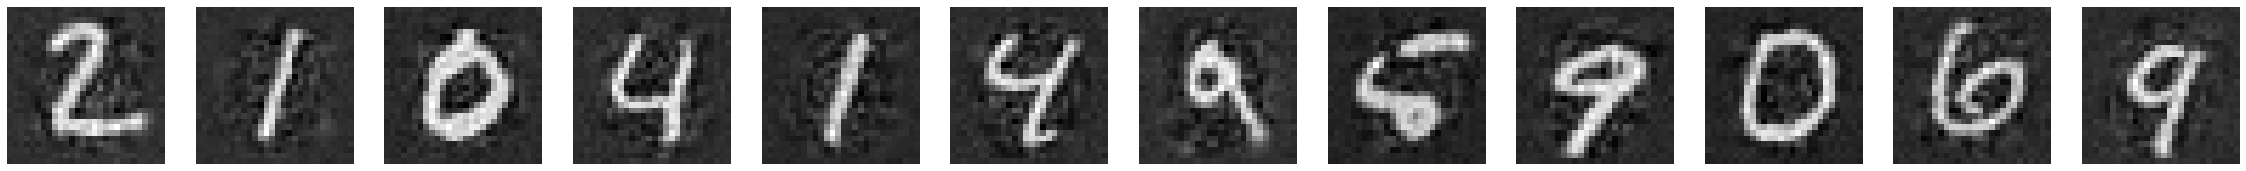

For N = 227


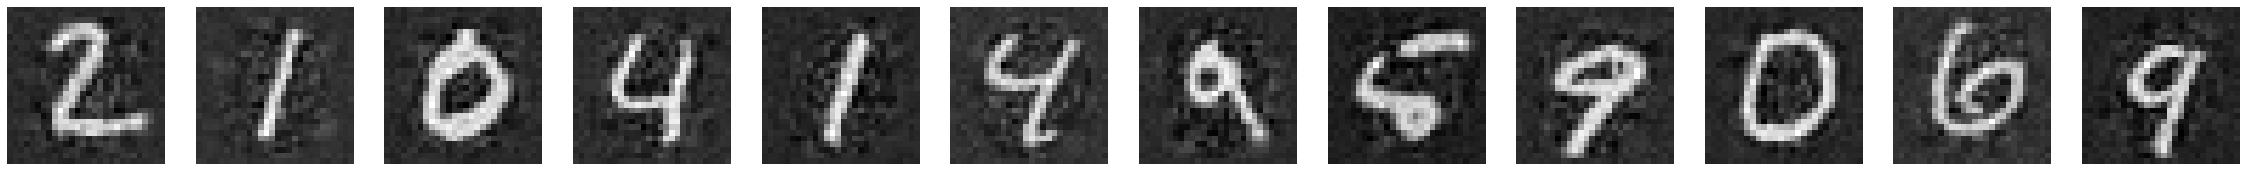

For N = 252


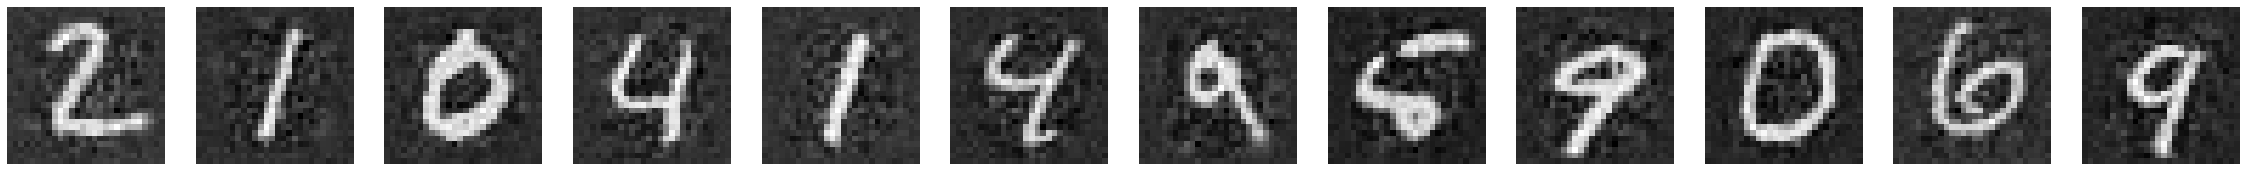

For N = 277


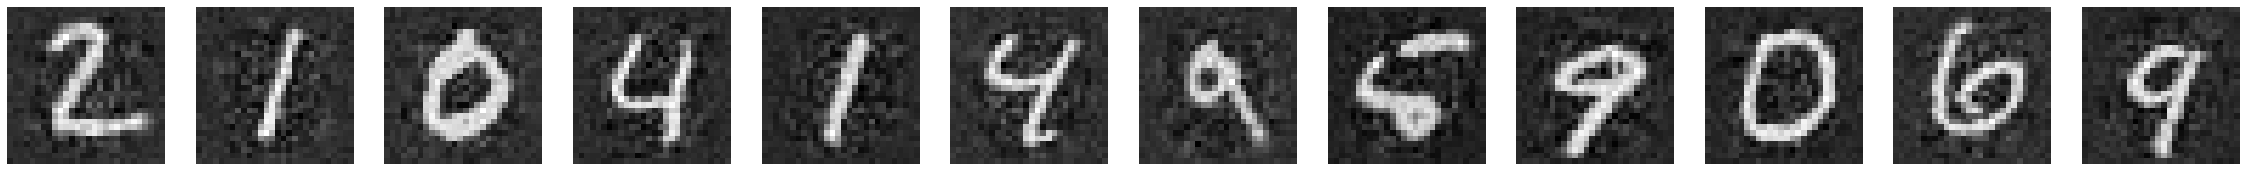

For N = 302


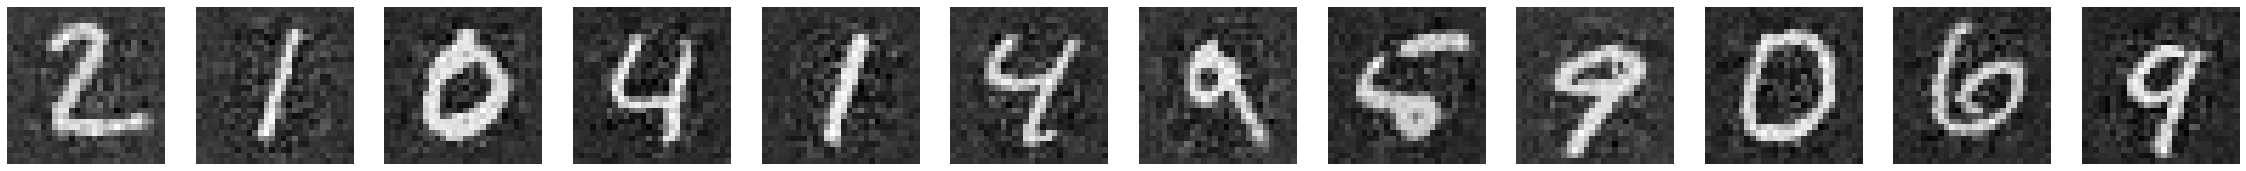

For N = 327


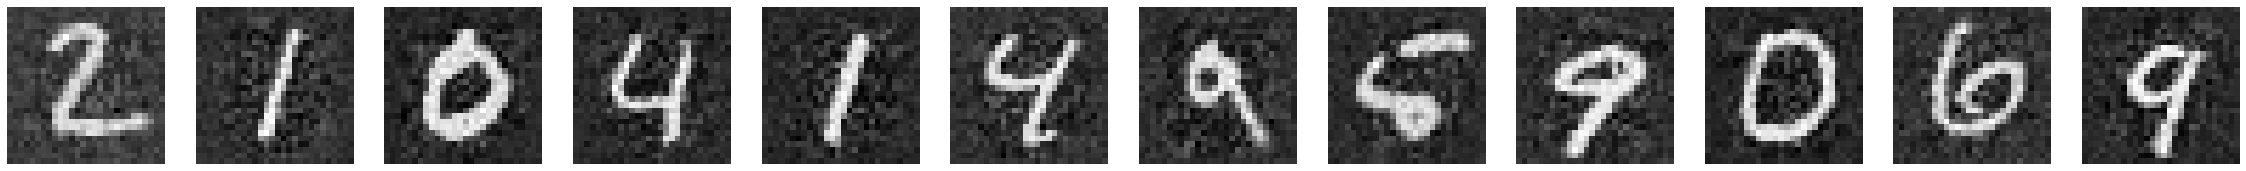

For N = 352


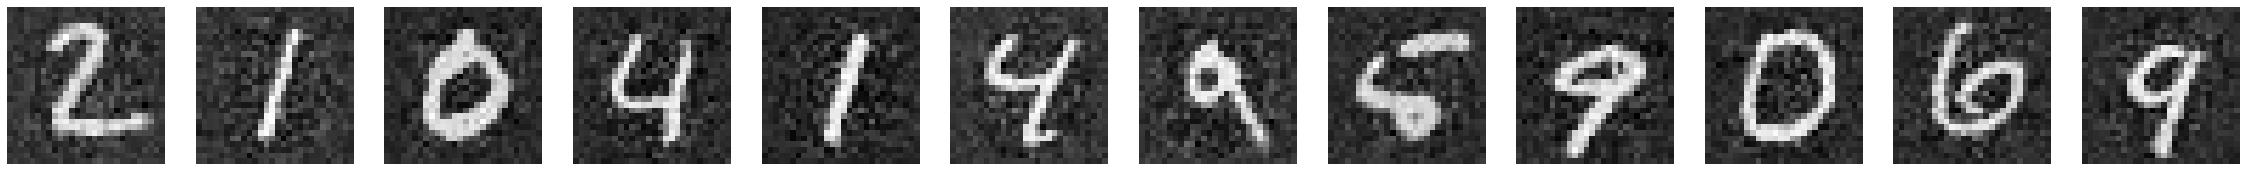

For N = 377


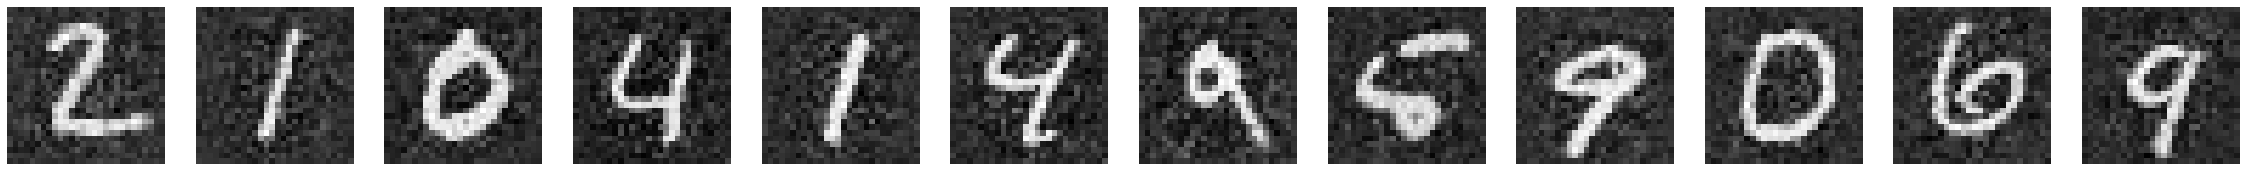

For N = 402


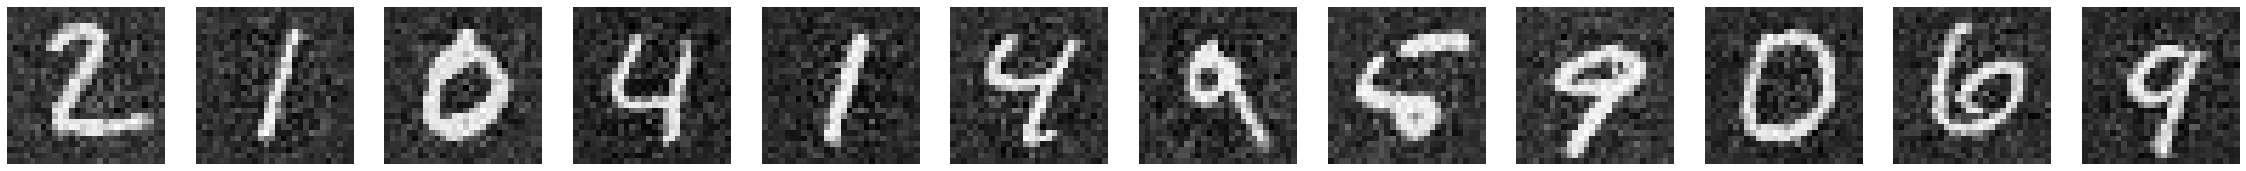

For N = 427


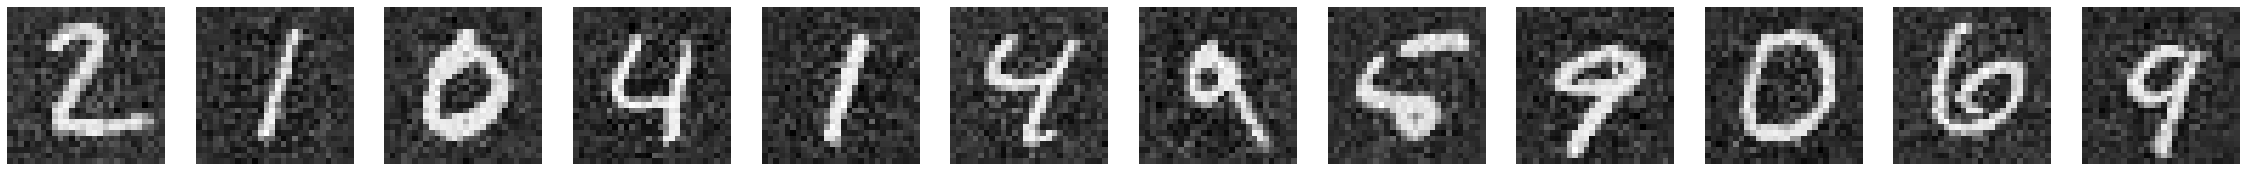

For N = 452


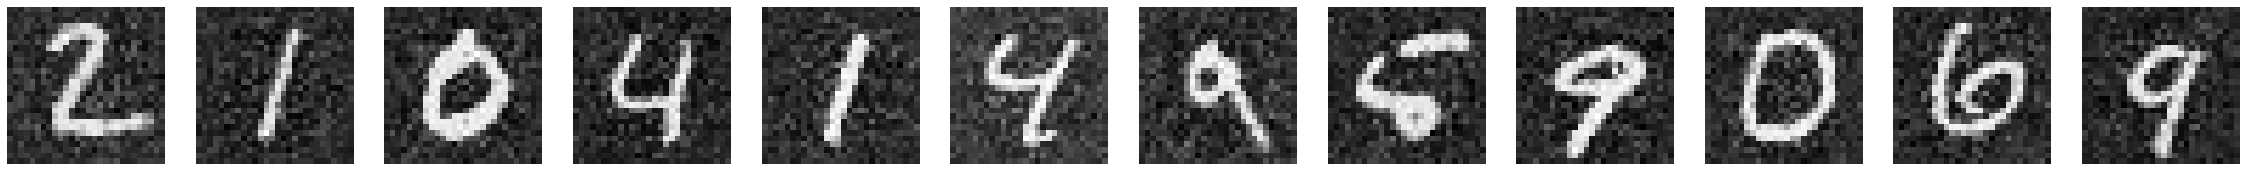

For N = 477


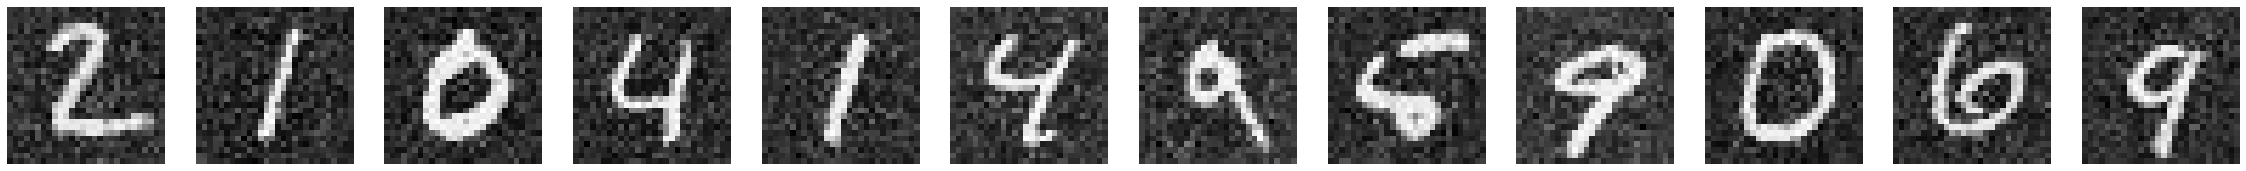

For N = 502


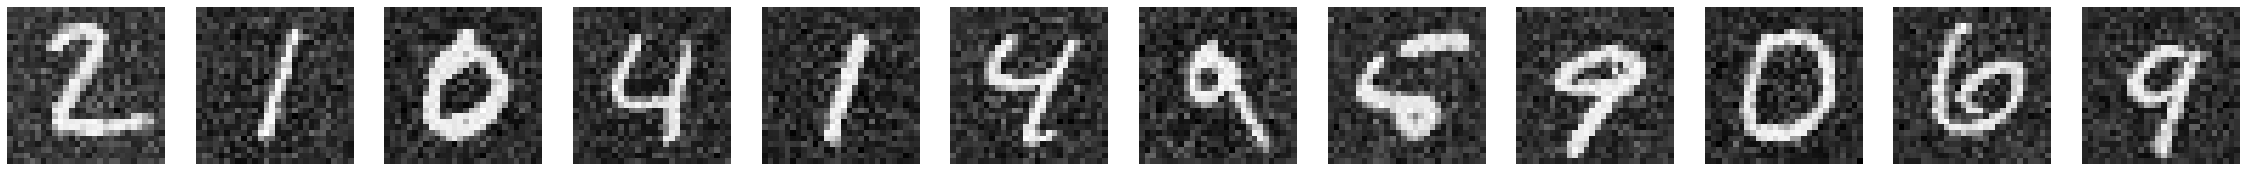

For N = 527


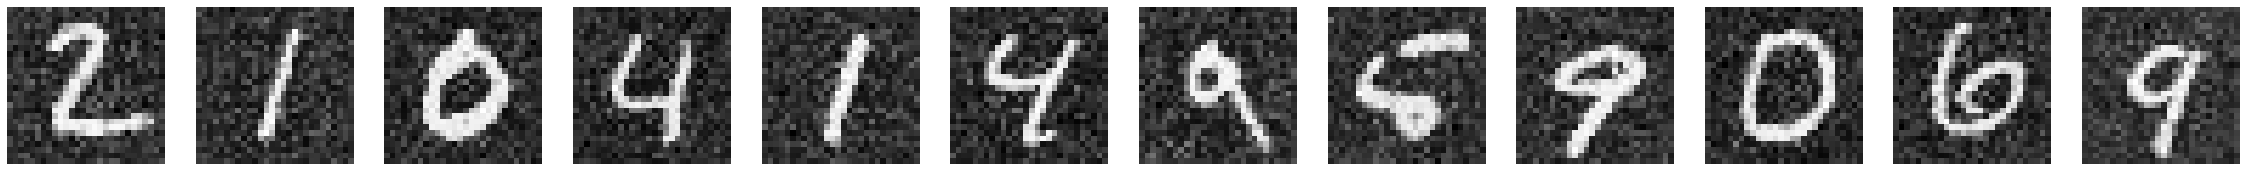

For N = 552


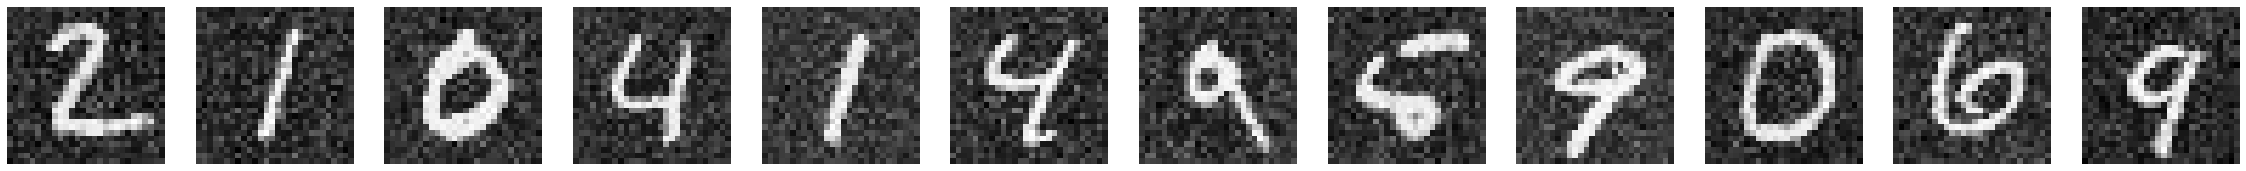

For N = 577


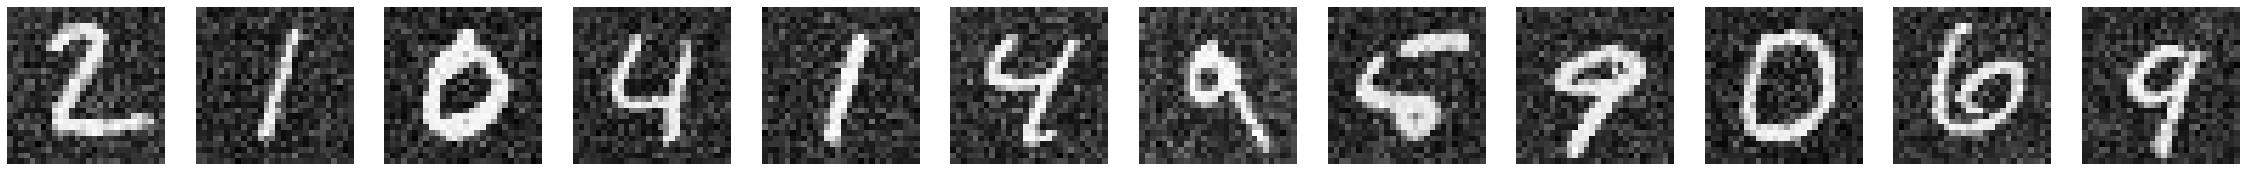

For N = 602


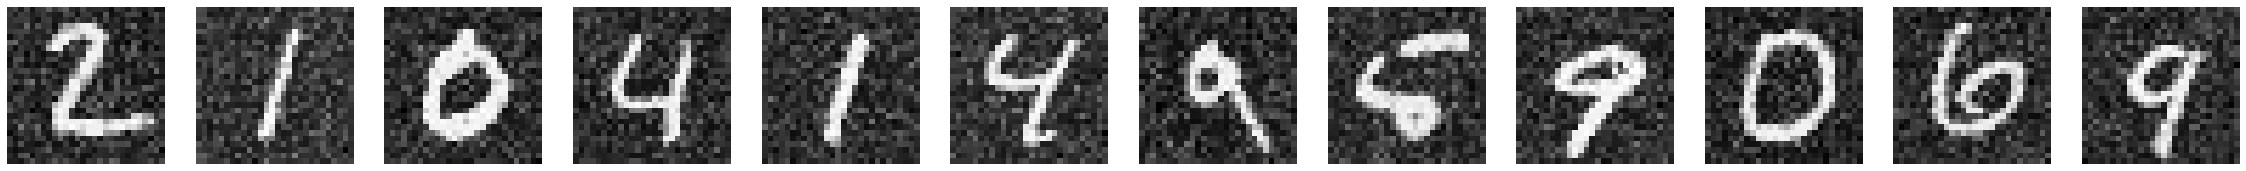

For N = 627


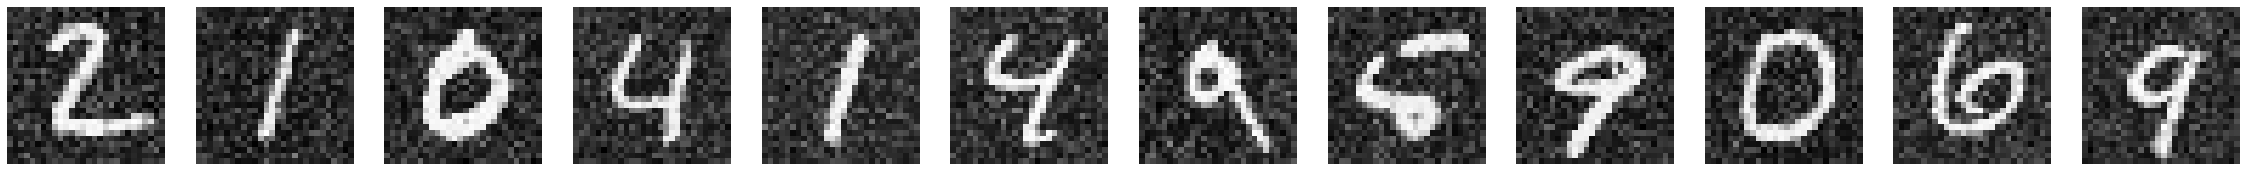

For N = 652


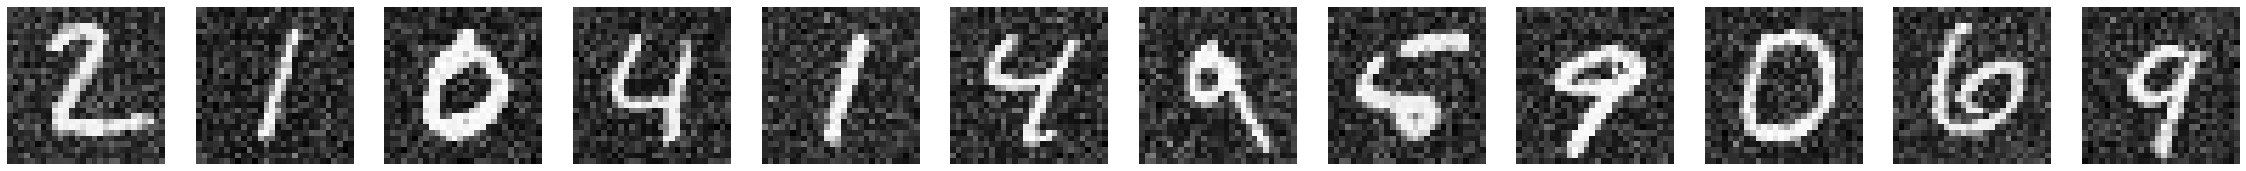

For N = 677


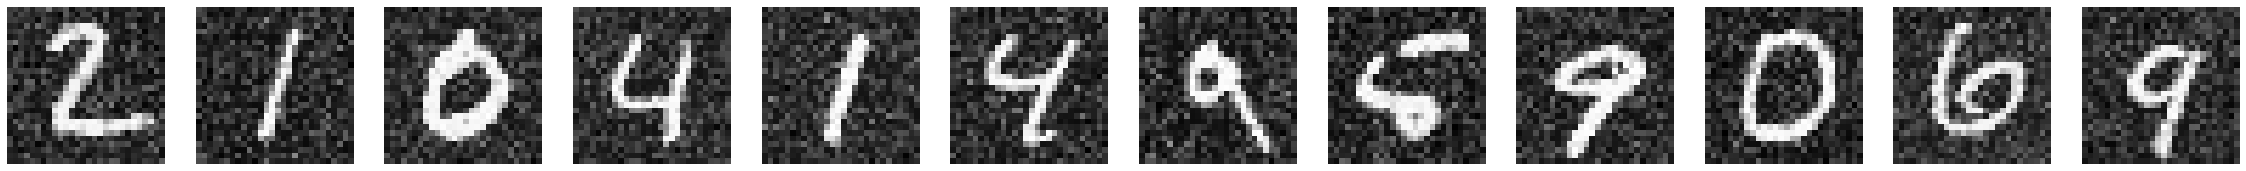

For N = 702


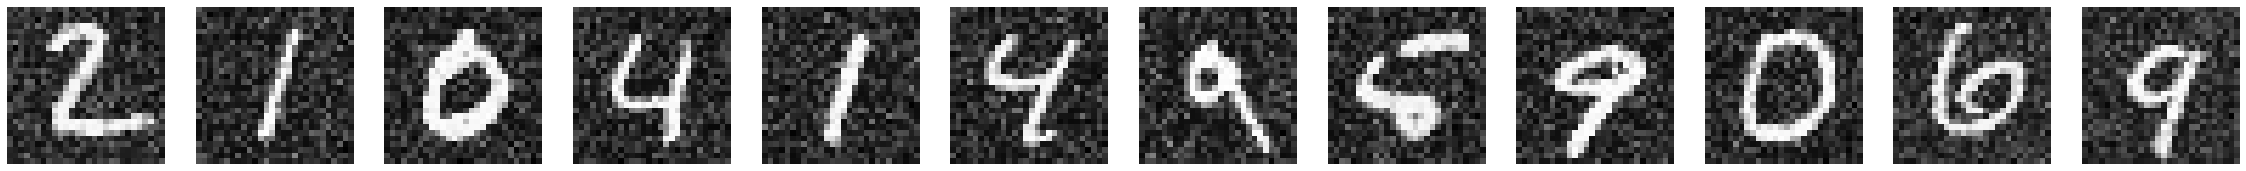

For N = 727


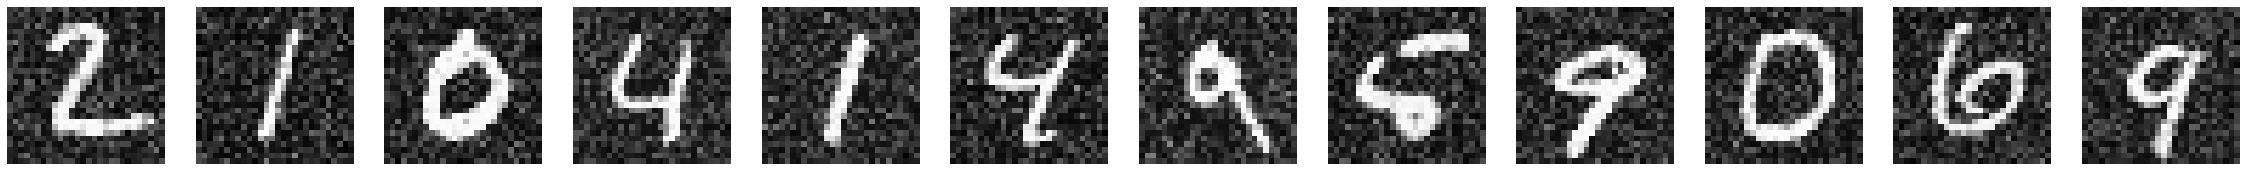

For N = 752


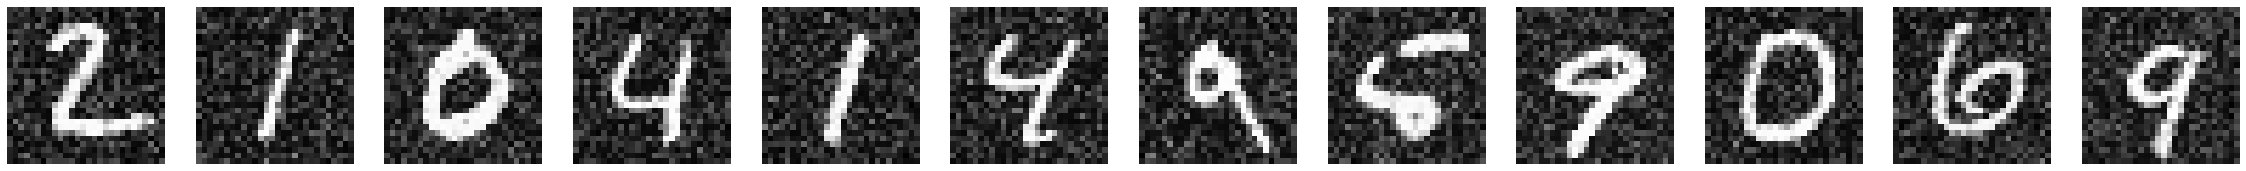

For N = 777


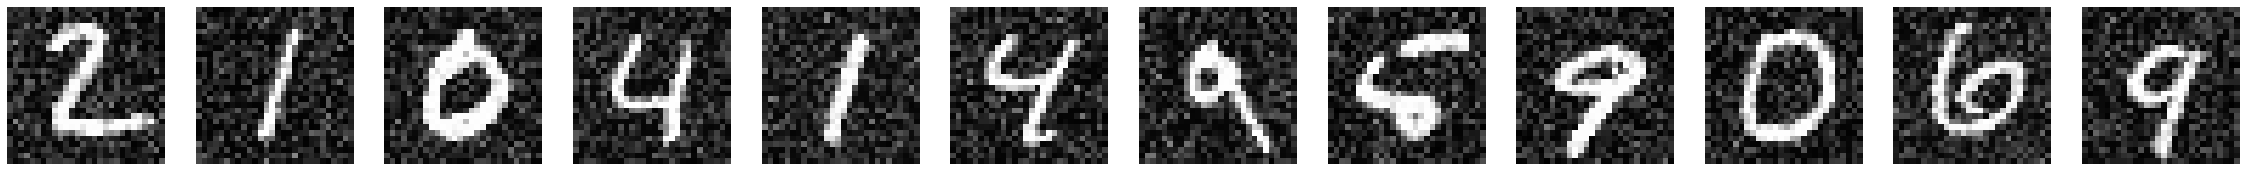

In [20]:
for i in range(2,784,25):
    using_lib(i)